In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [234]:
df = pd.read_csv(r"C:\Users\SinaCO\Desktop\machine_learning_with_python_jadi-main\h.csv")

import seaborn as sns
df.dropna(subset=['Area','Room','Parking','Warehouse','Elevator','Address','Price','Price(USD)'],inplace=True)
dm=df[df.Area.str.contains('00')].index
df1=df.drop(dm)



In [235]:
cdf = df1[['Area','Room',"Parking", "Warehouse", "Elevator",'Address','Price','Price(USD)']]
cdf.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [236]:
msk = np.random.rand(len(df1)) < 0.8
train = cdf[msk]
test = cdf[~msk]

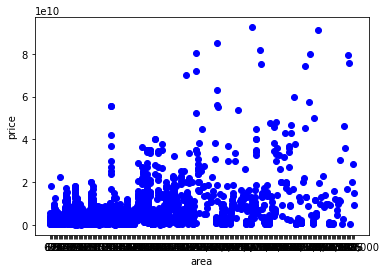

In [237]:
plt.scatter(df.Area,df.Price,  color='blue')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [238]:
tx= np.asanyarray(train[['Area','Room','Parking', 'Warehouse', "Elevator"]])
ty= np.asanyarray(train[['Price']])
X_train, X_test, y_train, y_test = train_test_split(tx,ty, test_size=0.2, random_state=42)


In [239]:
test

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
15,63,1,False,True,False,Islamshahr,570000000,19000.00
33,67,2,True,True,False,Feiz Garden,2350000000,78333.33
40,58,1,True,True,True,Saadat Abad,3400000000,113333.33
...,...,...,...,...,...,...,...,...
3451,88,2,True,True,True,Central Janatabad,4000000000,133333.33
3452,118,2,True,True,True,Mehran,7080000000,236000.00
3455,80,2,False,True,True,Shahryar,410000000,13666.67
3461,55,1,True,True,True,Punak,2300000000,76666.67


In [240]:
from sklearn import linear_model


In [241]:

regr = linear_model.LinearRegression()
tx= np.asanyarray(train[['Area','Room','Parking', 'Warehouse', "Elevator"]])
ty= np.asanyarray(train['Price'])
regr.fit (tx, ty)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 1.01108947e+08 -4.61590929e+08 -9.90610262e+07  1.11867212e+09
  9.11897588e+08]
Intercept:  -5985353661.352431


Residual sum of squares: 107474389150749851648.00
Variance score: 0.69


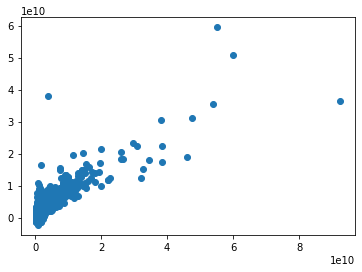

In [242]:
from sklearn.metrics import r2_score

x = (np.asanyarray(X_test))
y_hat= regr.predict(x)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))
plt.scatter(y,y_hat )

In [244]:
regr.predict([[63,1,1,1,1]])

array([1.85442773e+09])